# Binary Activity Classification, PLX Strategy

This is a copy of the [Binary Activity Classification](binary-classification.ipynb) notebook, but using a different strategy for splitting points, which didn't lead to any differences in feature distributions. It serves as an interesting counterpoint to the no-PLX results, and maybe as evidence that the no-PLX splitting strategy is meaningful, because not just _any_ splitting strategy will lead to different feature distributions.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
from guide.dataset import GuideDataset
from guide.plot_helpers import *
import random
import sklearn.tree
import sklearn.ensemble
import itertools

In [3]:
dataset = GuideDataset('data/example_guide_data_with_bowtie_with_mfold.tsv')
points = dataset.points
points = list(filter(lambda p: p.mfold_result().dG < 900, points)) # remove a small number of unfoldable points

In [4]:
def plot_activity_grid(title, points, ylim=8000):
    with figure_grid(3, 2, title) as fig:
        for d1, d2 in itertools.combinations([0, 7, 14], 2):
            for plx in ['base', 'plx']:
                fig.next_subplot()
                plot_activity(d1, d2, plx, points)
                plt.ylim(0, ylim)
                plt.axvline(0, color='red')
                plt.legend()

def compare_by(feature, bins=20, xrng=None, subplot=None):
    compare_point_groups_by(feature, active_points, same_gene_inactive_points, bins=bins, xrng=xrng, axis1=subplot)

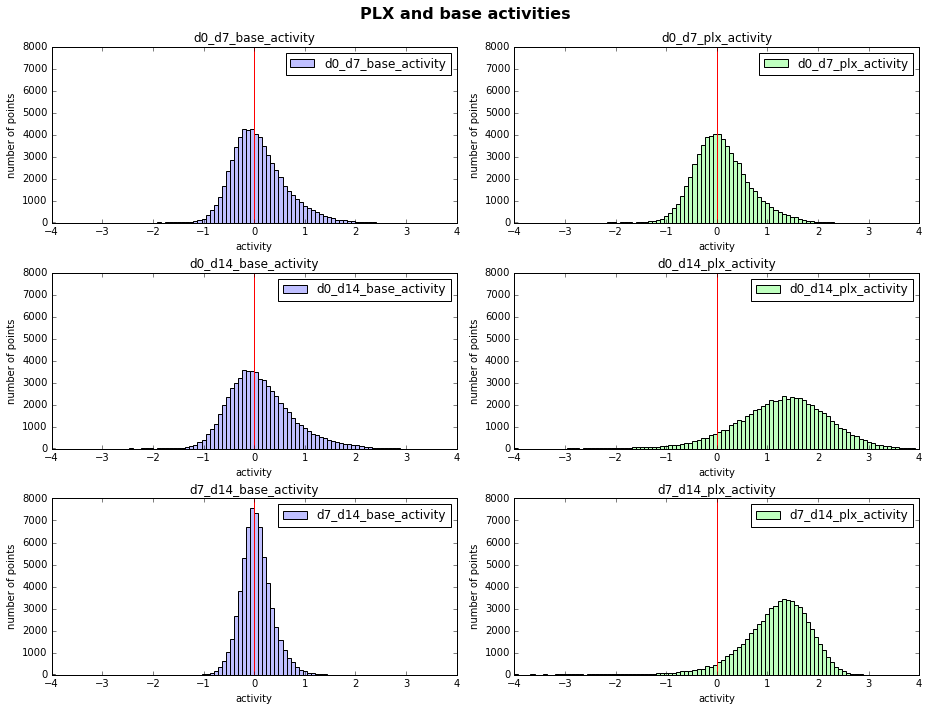

In [555]:
plot_activity_grid('PLX and base activities', points)

In [15]:
# the numbers are eyeballed from the graph; very negative PLX activity should mean that a CRISPR knockout gave the
# cell PLX resistance, while positive PLX activity should mean that no such favorable knockout happened.
is_active = lambda p: p.d7_d14_plx_activity() < -0.3
is_inactive = lambda p: p.d7_d14_plx_activity() > 1.5

active_points = list(filter(is_active, points))
inactive_points = list(filter(is_inactive, points))

print('out of', len(points), 'points, approximately', len(active_points), 'are active')
print('out of', len(points), 'points, approximately', len(inactive_points), 'are inactive')

active_point_genes = set([p.row['gene_name'] for p in active_points])
print('from the {} active points, there are {} genes'.format(len(active_points), len(active_point_genes)))

same_gene_inactive_points = [p for p in inactive_points if p.row['gene_name'] in active_point_genes]
print('there are {} inactive points on the same genes'.format(len(same_gene_inactive_points)))

pctg = 100 * len(active_points + same_gene_inactive_points)/float(len(points))
print('resulting binary dataset is {}% the original size'.format(round(pctg)))

out of 63815 points, approximately 2539 are active
out of 63815 points, approximately 21020 are inactive
from the 2539 active points, there are 2342 genes
there are 2422 inactive points on the same genes
resulting binary dataset is 8% the original size


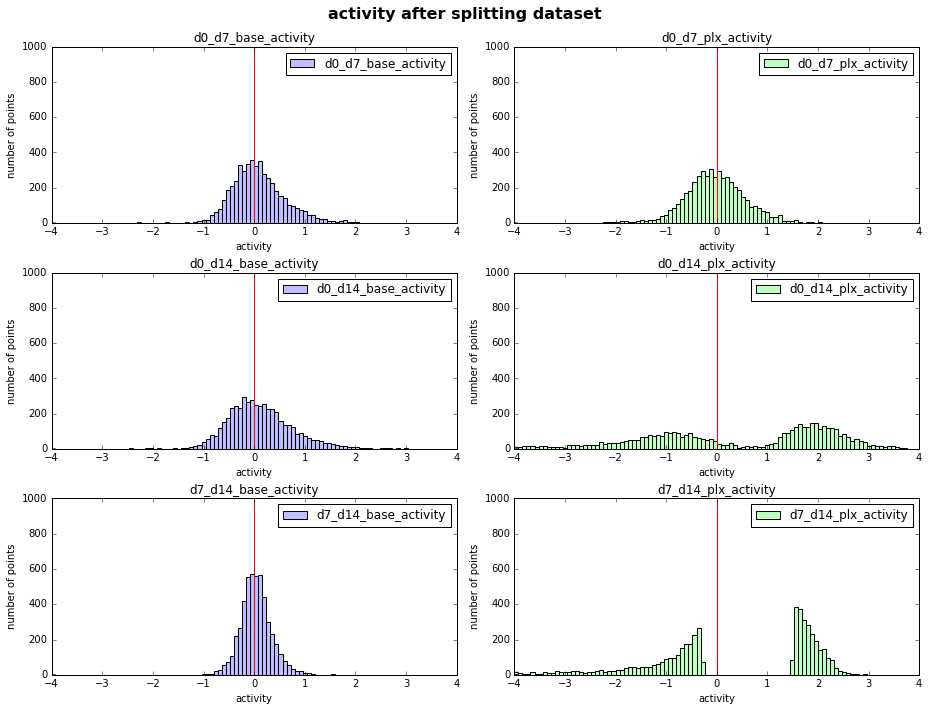

In [9]:
plot_activity_grid('activity after splitting dataset', active_points + same_gene_inactive_points, ylim=1000)

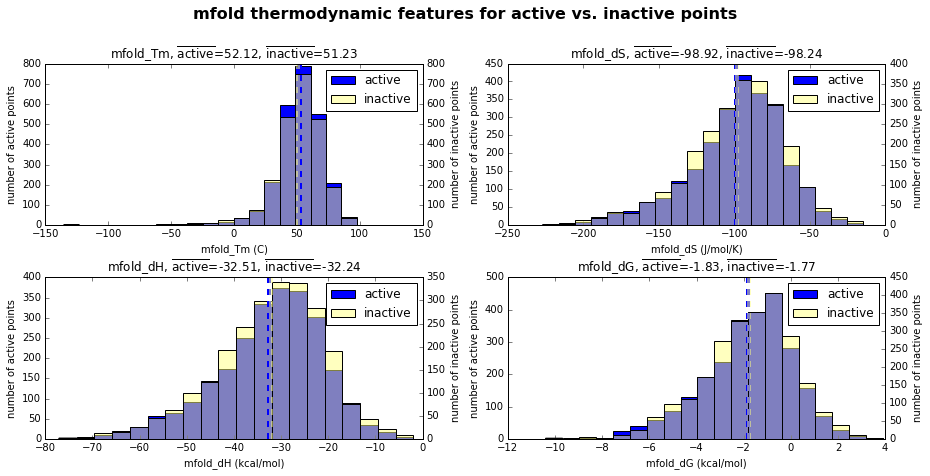

In [10]:
with figure_grid(2, 2, 'mfold thermodynamic features for active vs. inactive points') as fig:
    compare_by('mfold_Tm', subplot=fig.next_subplot())
    compare_by('mfold_dS', subplot=fig.next_subplot())
    compare_by('mfold_dH', subplot=fig.next_subplot())
    compare_by('mfold_dG', subplot=fig.next_subplot())

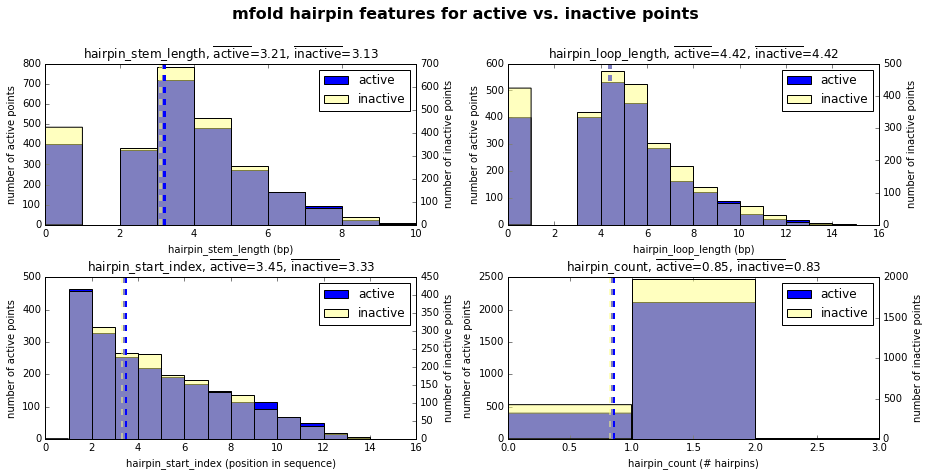

In [11]:
with figure_grid(2, 2, 'mfold hairpin features for active vs. inactive points') as fig:
    compare_by('hairpin_stem_length', bins=10, xrng=(0,10), subplot=fig.next_subplot())
    compare_by('hairpin_loop_length', bins=15, xrng=(0,15), subplot=fig.next_subplot())
    compare_by('hairpin_start_index', bins=15, xrng=(0,15), subplot=fig.next_subplot())
    compare_by('hairpin_count', bins=3, xrng=(0,3), subplot=fig.next_subplot())

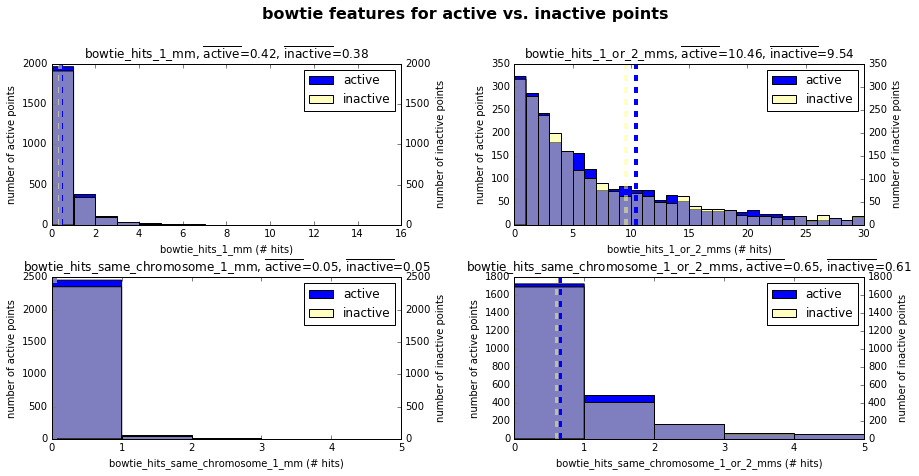

In [12]:
with figure_grid(2, 2, 'bowtie features for active vs. inactive points') as fig:
    compare_by('bowtie_hits_1_mm',                       bins=15, xrng=(0,15), subplot=fig.next_subplot())
    compare_by('bowtie_hits_1_or_2_mms',                 bins=30, xrng=(0,30), subplot=fig.next_subplot())
    compare_by('bowtie_hits_same_chromosome_1_mm',       bins=5,  xrng=(0,5),  subplot=fig.next_subplot())
    compare_by('bowtie_hits_same_chromosome_1_or_2_mms', bins=5,  xrng=(0,5),  subplot=fig.next_subplot())

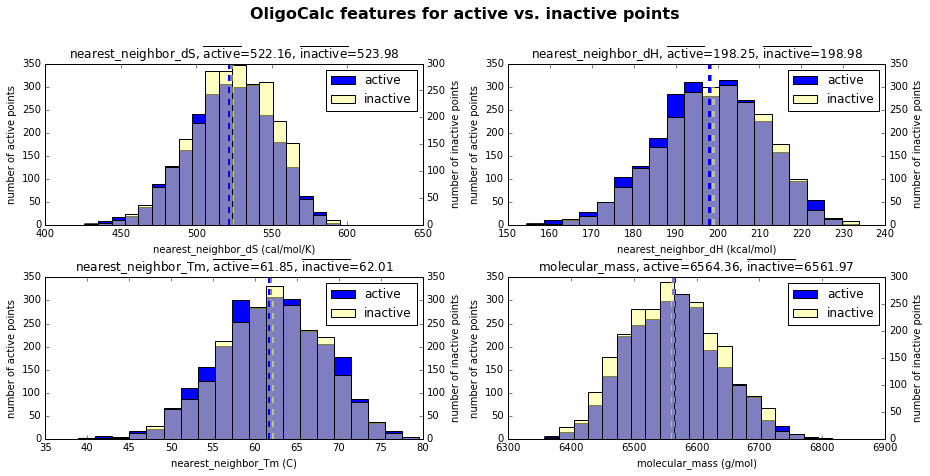

In [13]:
with figure_grid(2, 2, 'OligoCalc features for active vs. inactive points') as fig:
    compare_by('nearest_neighbor_dS', subplot=fig.next_subplot())
    compare_by('nearest_neighbor_dH', subplot=fig.next_subplot())
    compare_by('nearest_neighbor_Tm', subplot=fig.next_subplot())
    compare_by('molecular_mass', subplot=fig.next_subplot())

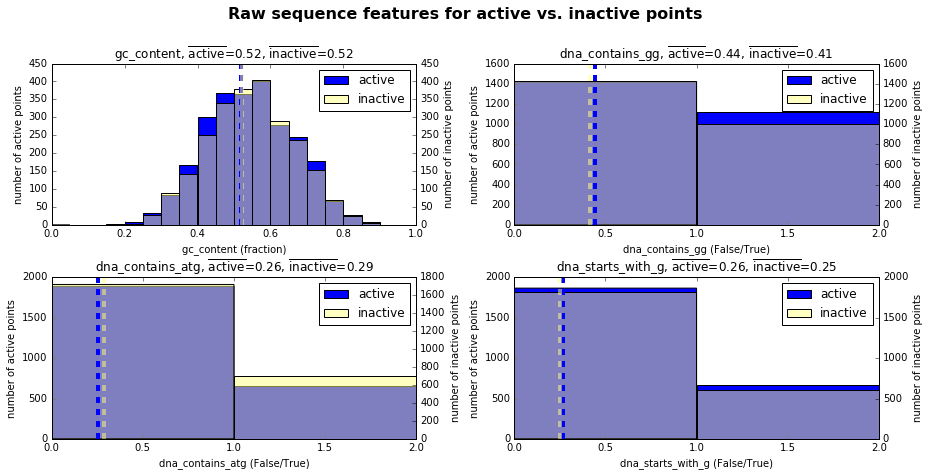

In [14]:
with figure_grid(2, 2, 'Raw sequence features for active vs. inactive points') as fig:
    compare_by('gc_content', xrng=(0,1), subplot=fig.next_subplot())
    compare_by('dna_contains_gg', bins=2, xrng=(0,2), subplot=fig.next_subplot())
    compare_by('dna_contains_atg', bins=2, xrng=(0,2), subplot=fig.next_subplot())
    compare_by('dna_starts_with_g', bins=2, xrng=(0,2), subplot=fig.next_subplot())